## Why do we need Regression ?

### Simple Linear Regression
Can we use HEIGHT to predict the WEIGHT of males ?

Model:

Weight of an individual = α + β x height of the individual
Methodology for fitting a model:

First divide the entire labelled data into 2 parts (1) Training data (2) Test data

On the training data we will train our model.

The trained model will then be tested on the test data.

We will judge the effectiveness of our trained model on correctness of the predictions on the test data using metrics such as (a) Root Mean Squared Error (RMSE)


In [52]:
import os # Importing library for operating system
import numpy as np # Importing library to handle number arrays
import pandas as pd # Importing library to handle data frames
import matplotlib.pyplot as plt # Importing library for plotting


In [53]:
data = pd.read_excel("HeightWeight.xlsx")
data = data.dropna()


In [88]:
data

,GENDER,AGE,WEIGHT,HEIGHT,MORE_THAN_SIXFOOT,LEG_LENGTH,WAIST_CIRCUMFERENCE,THIGH_CIRCUMFERENCE,BMI OVER 30
0,2,52,231.0,63.3,0,14.2,43.6,25.8,1.0
1,1,75,198.0,67.0,0,15.6,41.8,20.1,1.0
2,2,29,155.9,63.9,0,15.7,36.0,19.2,0.0
3,1,18,177.7,71.2,0,18.1,33.3,22.4,0.0
4,1,51,225.3,69.3,0,15.6,40.0,23.0,1.0
5,2,21,173.1,59.1,0,13.7,38.2,23.5,1.0
6,2,45,149.0,65.2,0,15.4,34.8,18.3,0.0
7,2,72,189.4,62.6,0,11.8,44.3,20.7,1.0
8,2,20,171.3,67.2,0,15.9,36.1,20.1,0.0
9,2,72,160.7,64.0,0,13.8,39.9,19.1,0.0


In [54]:
##Simple Linear Regression – Splitting the data

In [55]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


In [56]:
## Creating training dataset

In [57]:
data_male = data[data['GENDER']==1]
data_male_deletedOutliers = data_male[data_male['HEIGHT'] < 76]
data_male_deletedOutliers = data_male_deletedOutliers[data_male_deletedOutliers['WEIGHT']<300]


In [58]:
data_male_deletedOutliers_train_HEIGHT = data_male_deletedOutliers['HEIGHT'][:-10]
data_male_deletedOutliers_train_WEIGHT = data_male_deletedOutliers['WEIGHT'][:-10]


In [59]:
## Creating test dataset

In [60]:
data_male_deletedOutliers_test_HEIGHT = data_male_deletedOutliers['HEIGHT'][-10:]
data_male_deletedOutliers_test_WEIGHT = data_male_deletedOutliers['WEIGHT'][-10:]


In [61]:
print(data_male_deletedOutliers_train_HEIGHT)



1     67.0
3     71.2
4     69.3
11    69.3
13    70.5
14    73.9
15    66.1
17    68.8
18    68.3
20    68.7
21    65.7
22    68.3
23    65.9
24    69.4
27    65.0
36    69.9
38    68.7
39    73.4
48    67.2
50    63.5
51    70.1
54    68.5
57    67.2
58    68.3
59    69.9
60    66.7
65    70.1
66    72.4
Name: HEIGHT, dtype: float64


In [62]:
print(data_male_deletedOutliers_train_WEIGHT)


1     198.0
3     177.7
4     225.3
11    212.1
13    173.1
14    222.2
15    205.7
17    167.3
18    160.1
20    242.9
21    166.0
22    181.2
23    144.8
24    184.3
27    127.4
36    193.3
38    155.6
39    220.5
48    129.4
50    143.5
51    150.6
54    199.7
57    159.2
58    224.2
59    136.0
60    164.2
65    222.7
66    183.2
Name: WEIGHT, dtype: float64


## Simple Linear Regression – Fitting linear regression

In [63]:
## Create linear regression object

In [64]:
regr = linear_model.LinearRegression()

In [65]:
## Train the model using the training sets

In [68]:
regr.fit(data_male_deletedOutliers_train_HEIGHT.values.reshape(-1,1),data_male_deletedOutliers_train_WEIGHT.values.reshape(-1,1))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
## Make predictions using the testing set

In [71]:
data_males_WEIGHT_predicted = regr.predict(data_male_deletedOutliers_test_HEIGHT.values.reshape(-1,1))


In [72]:
## Make plots of predicted Weight and Actual Weight for the test data

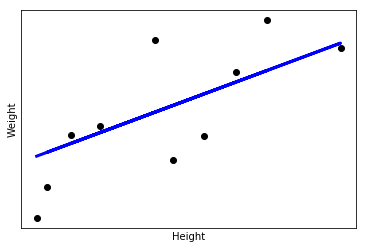

In [74]:
plt.scatter(data_male_deletedOutliers_test_HEIGHT, data_male_deletedOutliers_test_WEIGHT,  color='black')
plt.plot(data_male_deletedOutliers_test_HEIGHT, data_males_WEIGHT_predicted, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()


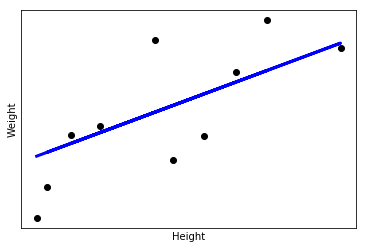

In [75]:
plt.scatter(data_male_deletedOutliers_test_HEIGHT, data_male_deletedOutliers_test_WEIGHT,  color='black')
plt.plot(data_male_deletedOutliers_test_HEIGHT, data_males_WEIGHT_predicted, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel("Height")
plt.ylabel("Weight")
plt.grid()
plt.show()


In [76]:
print("Root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(data_male_deletedOutliers_test_WEIGHT, data_males_WEIGHT_predicted)))


Root Mean squared error: 27.22


## Linear Regression

In [81]:
##Can we determine the weight of females using all the variables in the dataset (except BMI over 30) ?


In [89]:
data_female = data[data['GENDER']==2]
data_females_outliersdeleted = data_female[data_female['HEIGHT'] <90]    
data_females_outliersdeleted = data_females_outliersdeleted[data_females_outliersdeleted['HEIGHT'] >40]    


In [90]:
data_females_outliersdeleted = data_females_outliersdeleted[data_females_outliersdeleted['HEIGHT'] <70]    
data_females_outliersdeleted = data_females_outliersdeleted[data_females_outliersdeleted['WEIGHT'] <350]


In [91]:
data_females_outliersdeleted_drop_BMI = data_females_outliersdeleted.drop(['BMI OVER 30'], axis = 1)

In [92]:
data_females_outliersdeleted_drop_BMI = data_females_outliersdeleted_drop_BMI[data_females_outliersdeleted_drop_BMI['LEG_LENGTH'] > 0]
data_females_outliersdeleted_drop_BMI = data_females_outliersdeleted_drop_BMI[data_females_outliersdeleted_drop_BMI['WAIST_CIRCUMFERENCE'] > 0]
data_females_outliersdeleted_drop_BMI = data_females_outliersdeleted_drop_BMI[data_females_outliersdeleted_drop_BMI['THIGH_CIRCUMFERENCE'] > 0]


In [93]:
## Creating training dataset

In [94]:
data_females_outliersdeleted_train_X = data_females_outliersdeleted_drop_BMI[:-10]
data_females_outliersdeleted_train_X = data_females_outliersdeleted_train_X.drop(['WEIGHT'], axis = 1)
data_females_outliersdeleted_train_Y = data_females_outliersdeleted_drop_BMI['WEIGHT'][:-10]


In [95]:
 ## Creating test dataset

In [96]:
data_females_outliersdeleted_test_X = data_females_outliersdeleted_drop_BMI[-10:]
data_females_outliersdeleted_test_X = data_females_outliersdeleted_test_X.drop(['WEIGHT'], axis = 1)
data_females_outliersdeleted_test_Y = data_females_outliersdeleted_drop_BMI['WEIGHT'][-10:]


In [97]:
## Create linear regression object

In [98]:
regr = linear_model.LinearRegression()

In [99]:
## Train the model using the training sets

In [100]:
regr.fit(data_females_outliersdeleted_train_X, data_females_outliersdeleted_train_Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
## Make predictions using the testing set

In [102]:
data_females_WEIGHT_predicted = regr.predict(data_females_outliersdeleted_test_X)


In [103]:
## Making plots of actual weights and predicted weights

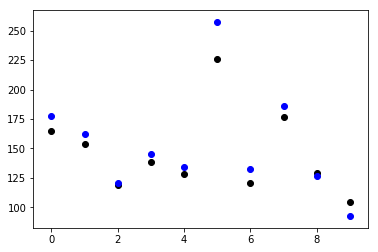

In [104]:
plt.scatter(np.arange(len(data_females_WEIGHT_predicted)), data_females_outliersdeleted_test_Y, color = 'k')
plt.scatter(np.arange(len(data_females_WEIGHT_predicted)), data_females_WEIGHT_predicted, color = 'b')
plt.show()


## How good is the Linear fit ?

In [105]:
print("Root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(data_females_outliersdeleted_test_Y, data_females_WEIGHT_predicted)))


Root Mean squared error: 12.81


## Logistic Regression

In [114]:
##Can we determine for males whether BMI OVER 30 is 1 or 0 for individuals taking all the remaining variables as input variables ?


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [116]:
data_male_deletedOutliers_Y = data_male_deletedOutliers['BMI OVER 30']
data_male_deletedOutliers_X = data_male_deletedOutliers.drop(['BMI OVER 30'], axis = 1)



In [117]:
## Creating training/testing dataset

In [118]:
X_train, X_test, y_train, y_test = train_test_split(data_male_deletedOutliers_X, data_male_deletedOutliers_Y, test_size=0.3, random_state=42)


In [119]:
## Create linear regression object

In [120]:
logisticRegr = LogisticRegression()



In [121]:
## Train the model using the training sets

In [122]:
logisticRegr.fit(X_train, y_train)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [123]:
## Make predictions using the testing set

In [124]:
BMI_OVER_30_PREDICTED_FOR_MALES = logisticRegr.predict(X_test)


In [125]:
## Printing Actual BMI OVER 30 and predictied



In [126]:
print("Actual BMI OVER 30 or not:")
print(np.asarray(y_test))
print("Predicted BMI OVER 30 or not:")
print(np.asarray(BMI_OVER_30_PREDICTED_FOR_MALES))


Actual BMI OVER 30 or not:
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
Predicted BMI OVER 30 or not:
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]


In [127]:
from sklearn import metrics
metrics.roc_auc_score(y_test, BMI_OVER_30_PREDICTED_FOR_MALES)


1.0

In [128]:
sklearn.feature_selection.f_regression(X_train,y_train, center=True)


NameError: name 'sklearn' is not defined

In [129]:
import sklearn
sklearn.feature_selection.f_regression(X_train,y_train, center=True)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


(array([        nan,  0.36948782, 23.61075776,  0.24542982,  0.760181  ,
         0.82844381, 21.24254264,  9.67777057]),
 array([           nan, 5.48992938e-01, 5.94314233e-05, 6.24817361e-01,
        3.91910890e-01, 3.71773988e-01, 1.12248049e-04, 4.76115678e-03]))

## LASSO Regression

##### Can we predict BMI OVER 30 for females using LASSO Regression models ?


In [130]:
data_females_outliersdeleted = data_females_outliersdeleted[data_females_outliersdeleted['LEG_LENGTH'] > 0]
data_females_outliersdeleted = data_females_outliersdeleted[data_females_outliersdeleted['WAIST_CIRCUMFERENCE'] > 0]
data_females_outliersdeleted = data_females_outliersdeleted[data_females_outliersdeleted['THIGH_CIRCUMFERENCE'] > 0]


from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

data_females_outliersdeleted_Y = data_females_outliersdeleted['BMI OVER 30']
data_females_outliersdeleted_X = data_females_outliersdeleted.drop(['BMI OVER 30'], axis = 1)


In [131]:
## Creating training/testing dataset

In [132]:
X_train, X_test, y_train, y_test = train_test_split(data_females_outliersdeleted_X, data_females_outliersdeleted_Y, test_size=0.3, random_state=42)


In [133]:
## Create linear regression object


In [134]:
lassoRegr = Lasso(alpha=1e-03,normalize=True, max_iter=1e5)


In [135]:
## Train the model using the training sets


In [136]:
lassoRegr.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100000.0,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [137]:
## Make predictions using the testing set

In [138]:
BMI_OVER_30_PREDICTED_FOR_FEMALES = lassoRegr.predict(X_test)



In [139]:
## Printing Actual BMI OVER 30 and predicated


In [140]:

print("Actual BMI OVER 30 or not:")
print(np.asarray(y_test))
print("Predicted BMI OVER 30 or not:")
print(np.asarray(BMI_OVER_30_PREDICTED_FOR_FEMALES))


Actual BMI OVER 30 or not:
[1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0.]
Predicted BMI OVER 30 or not:
[ 1.59541975  0.39531561  0.79007265  0.94333408  0.57161954 -0.07811438
  0.62184509  1.19137311  0.17366556  0.00239921  0.50205638  0.652579
  0.31926985  0.16114262  0.17738931]


### Refined LASSO With threshold

In [141]:
data_females_outliersdeleted = data_females_outliersdeleted[data_females_outliersdeleted['LEG_LENGTH'] > 0]
data_females_outliersdeleted = data_females_outliersdeleted[data_females_outliersdeleted['WAIST_CIRCUMFERENCE'] > 0]
data_females_outliersdeleted = data_females_outliersdeleted[data_females_outliersdeleted['THIGH_CIRCUMFERENCE'] > 0]


In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

data_females_outliersdeleted_Y = data_females_outliersdeleted['BMI OVER 30']
data_females_outliersdeleted_X = data_females_outliersdeleted.drop(['BMI OVER 30'], axis = 1)


In [143]:
## Creating training/testing dataset

In [144]:
X_train, X_test, y_train, y_test = train_test_split(data_females_outliersdeleted_X, data_females_outliersdeleted_Y, test_size=0.3, random_state=42)



In [146]:
## Create linear regression object


In [147]:
lassoRegr = Lasso(alpha=1e-03,normalize=True, max_iter=1e5)

In [148]:
## Train the model using the training sets


In [149]:
lassoRegr.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100000.0,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [150]:
## Make predictions using the testing set


In [151]:
BMI_OVER_30_PREDICTED_FOR_FEMALES = lassoRegr.predict(X_test)


In [152]:
## Making the predictions with threshold

In [153]:
BMI_OVER_30_PREDICTED_FOR_FEMALES_WITH_THRESHOLD = []
count = 0
while (count < len(BMI_OVER_30_PREDICTED_FOR_FEMALES)):
    if (BMI_OVER_30_PREDICTED_FOR_FEMALES[count] >= 0.5):
        BMI_OVER_30_PREDICTED_FOR_FEMALES_WITH_THRESHOLD.append(1)
    else:
        BMI_OVER_30_PREDICTED_FOR_FEMALES_WITH_THRESHOLD.append(0)
    count = count + 1


In [154]:
## Printing Actual BMI OVER 30 and predictied

In [155]:
print("Actual BMI OVER 30 or not:")
print(np.asarray(y_test))
print("Predicted BMI OVER 30 or not after thresholding:")
print(np.asarray(BMI_OVER_30_PREDICTED_FOR_FEMALES_WITH_THRESHOLD))


Actual BMI OVER 30 or not:
[1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0.]
Predicted BMI OVER 30 or not after thresholding:
[1 0 1 1 1 0 1 1 0 0 1 1 0 0 0]


#### How accurate was the prediction ?


In [156]:
from sklearn import metrics
metrics.roc_auc_score(y_test, BMI_OVER_30_PREDICTED_FOR_FEMALES_WITH_THRESHOLD)


0.9444444444444444

In [157]:
print("Root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, BMI_OVER_30_PREDICTED_FOR_FEMALES_WITH_THRESHOLD)))


Root Mean squared error: 0.26


### What are the most important features for prediction BMI over 30 ?


In [158]:
import sklearn
sklearn.feature_selection.f_regression(X_train,y_train, center=True)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: 

(array([           nan, 1.80866375e+00, 8.47047342e+01, 1.24419847e+00,
                   nan, 5.01701012e-02, 5.53963355e+01, 5.71980655e+01]),
 array([           nan, 1.87839370e-01, 1.24023114e-10, 2.72720636e-01,
                   nan, 8.24148520e-01, 1.48959164e-08, 1.06200380e-08]))